# Acoustic source localization using Bayesian optimization and a Gaussian process surrogate model

In [1]:
import ast
from pathlib import Path
import sys

print(Path.cwd().parents[0])
sys.path.insert(0, Path.cwd().parents[0].resolve().as_posix())

from ax.utils.notebook.plotting import init_notebook_plotting, render
from ax.service.ax_client import AxClient
from IPython.display import Video
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from oao.utilities import load_config

init_notebook_plotting()

ROOT = Path.home() / "Research" / "Projects" / "BOGP"
FIGURE_PATH = ROOT / "Reports" / "JASA" / "figures"
SAVEFIG_KWARGS = {"dpi": 200, "facecolor": "white", "bbox_inches": "tight"}
AMBSURF_PATH = ROOT / "Data" / "SWELLEX96" / "VLA" / "selected" / "multifreq" / "148.0-166.0-201.0-235.0-283.0-338.0-388.0"

/home/wfjenkin/Research/Projects/BOGP


## 1. Bayesian Optimization in Action

### 1-D Case: Range Estimation

### 2-D Case: Localization

## 2. Simulations

### Range Estimation

Read in simulation results and format the data frame.

In [2]:
sim_dir = ROOT / "Data" / "range_estimation" / "simulation"
serial = "serial_230217"

df = pd.read_csv(sim_dir / serial / "results" / "aggregated_results.csv")
df = df.loc[:, ~df.columns.str.match("Unnamed")]
df["scenario"] = (
    df["scenario"]
    .apply(lambda x: ast.literal_eval(x))
    .apply(lambda x: list(x.values())[0])
)
df["best_range"] = (
    df["best_parameters"]
    .apply(lambda x: ast.literal_eval(x))
    .apply(lambda x: list(x.values())[0])
)
df = df.rename(columns={"scenario": "range"})
df["best_range_error"] = np.abs(df["best_range"] - df["range"])
df = df.replace({"strategy": "sequential_qpi1"}, "PI")
df = df.replace({"strategy": "sequential_qei1"}, "EI")
df = df.replace({"strategy": "greedy_batch_qei5"}, "qEI")
df = df.replace({"strategy": "lhs"}, "LHS")
df = df.replace({"strategy": "random"}, "Rand")
df = df.replace({"strategy": "sobol"}, "Sobol")
df = df.replace({"strategy": "grid"}, "Grid")
df["trial_index"] = df["trial_index"] + 1

Plot optimization history and range estimation error.

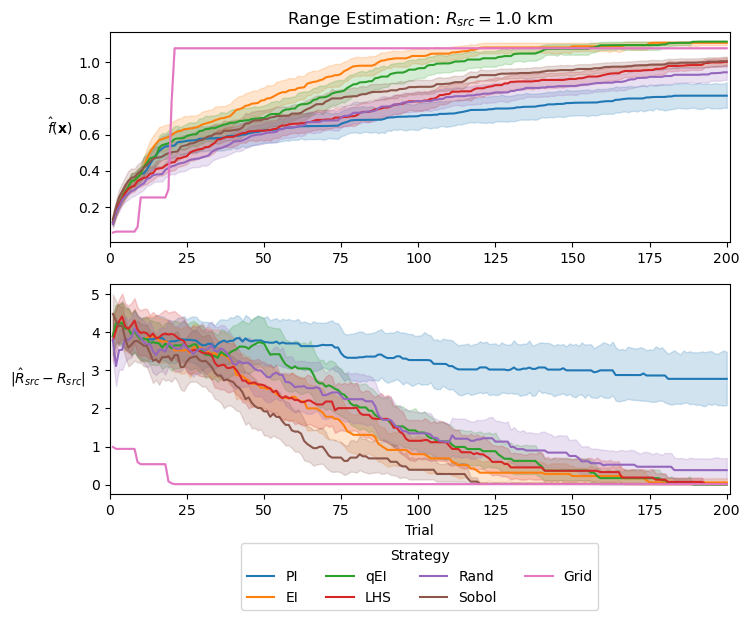

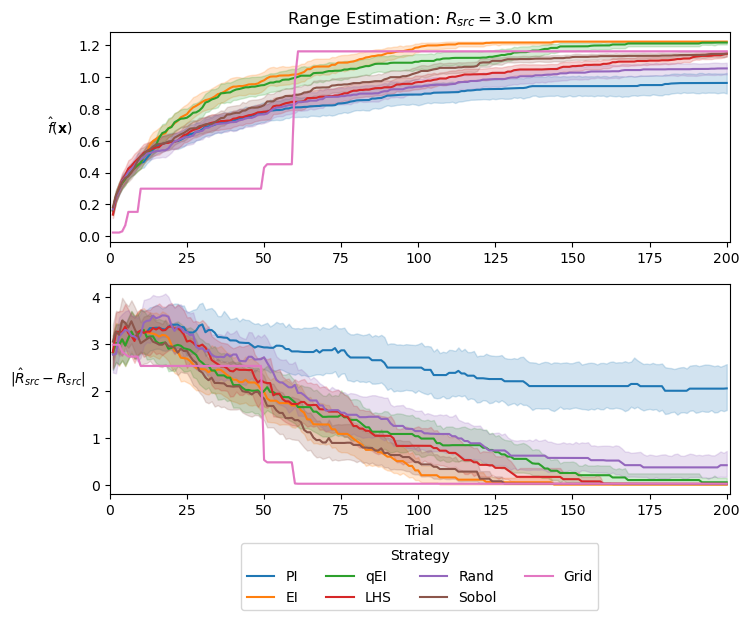

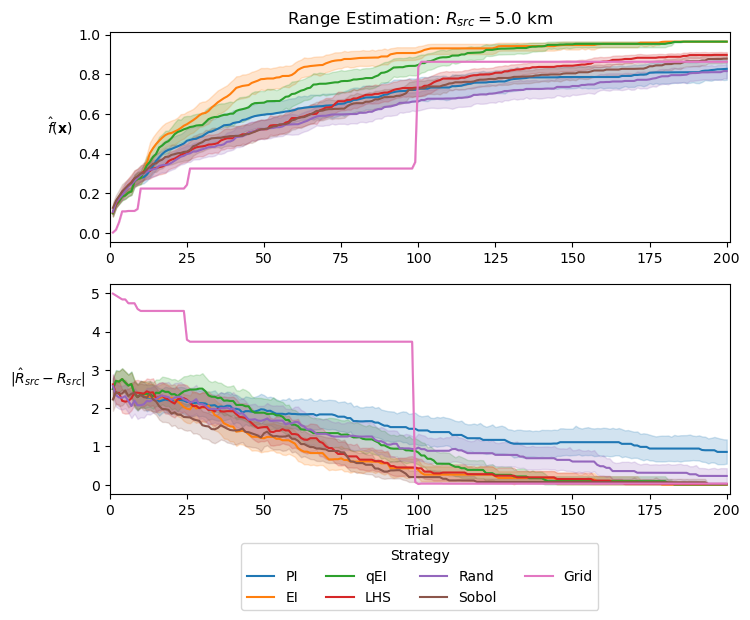

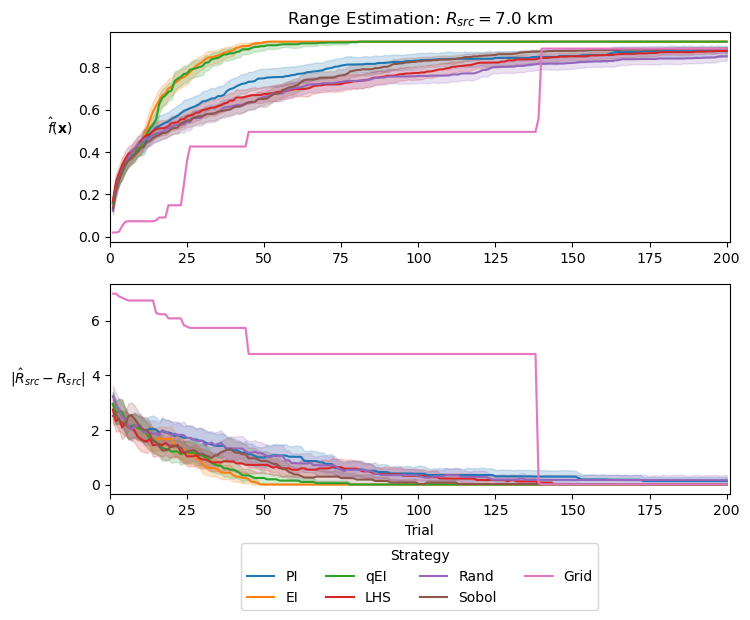

In [66]:
for r in sorted(df["range"].unique()):
    selection = df["range"] == r

    fig, axs = plt.subplots(figsize=(8, 6), nrows=2)

    ax = axs[0]
    sns.lineplot(
        data=df[selection],
        x="trial_index",
        y="best_values",
        hue="strategy",
        ax=ax,
        legend=None,
    )
    ax.set_xlim([0, 201])
    ax.set_xlabel(None)
    ax.set_ylabel("$\hat{f}(\mathbf{x})$", rotation=0, ha="right")
    ax.set_title(f"Range Estimation: $R_{{src}} = {r}$ km")

    ax = axs[1]
    sns.lineplot(
        data=df[selection], x="trial_index", y="best_range_error", hue="strategy", ax=ax
    )
    ax.set_xlim([0, 201])
    sns.move_legend(
        ax, "upper center", bbox_to_anchor=(0.5, -0.2), ncol=4, title="Strategy"
    )
    ax.set_xlabel("Trial")
    ax.set_ylabel("$\\vert \hat{R}_{src}- R_{src} \\vert$", rotation=0, ha="right")
    ax.set_title(None)

    fig.savefig(
        FIGURE_PATH.parents[1] / "Figures" / f"perf_hist_rs_{r}km.png", **SAVEFIG_KWARGS
    )
    plt.show()

### Localization

Read in simulation results and format the data frame.

In [ ]:
sim_dir = ROOT / "Data" / "localization" / "simulation"
serial = "serial_230218"

df = pd.read_csv(sim_dir / serial / "results" / "aggregated_results.csv")
df = df.loc[:, ~df.columns.str.match("Unnamed")]
df["scenario"] = (
    df["scenario"]
    .apply(lambda x: ast.literal_eval(x))
    .apply(lambda x: list(x.values())[0])
)
df["best_range"] = (
    df["best_parameters"]
    .apply(lambda x: ast.literal_eval(x))
    .apply(lambda x: list(x.values())[0])
)
df["best_depth"] = (
    df["best_parameters"]
    .apply(lambda x: ast.literal_eval(x))
    .apply(lambda x: list(x.values())[0])
)
df = df.rename(columns={"scenario": "range"})
df["best_range_error"] = np.abs(df["best_range"] - df["range"])
df = df.replace({"strategy": "sequential_qpi1"}, "PI")
df = df.replace({"strategy": "sequential_qei1"}, "EI")
df = df.replace({"strategy": "greedy_batch_qei5"}, "qEI")
df = df.replace({"strategy": "lhs"}, "LHS")
df = df.replace({"strategy": "random"}, "Rand")
df = df.replace({"strategy": "sobol"}, "Sobol")
df = df.replace({"strategy": "grid"}, "Grid")
df["trial_index"] = df["trial_index"] + 1

Plot optimization history and range/depth estimation error.

In [ ]:
for r in sorted(df["range"].unique()):
    selection = df["range"] == r

    fig, axs = plt.subplots(figsize=(8, 9), nrows=3)

    ax = axs[0]
    sns.lineplot(
        data=df[selection],
        x="trial_index",
        y="best_values",
        hue="strategy",
        ax=ax,
        legend=None,
    )
    ax.set_xlim([0, 201])
    ax.set_xlabel(None)
    ax.set_ylabel("$\hat{f}(\mathbf{x})$", rotation=0, ha="right")
    ax.set_title(f"Range Estimation: $R_{{src}} = {r}$ km")

    ax = axs[1]
    sns.lineplot(
        data=df[selection],
        x="trial_index",
        y="best_range_error",
        hue="strategy",
        ax=ax,
        legend=None,
    )
    ax.set_xlim([0, 201])
    ax.set_xlabel(None)
    ax.set_ylabel("$\\vert \hat{R}_{src}- R_{src} \\vert$", rotation=0, ha="right")
    ax.set_title(None)

    ax = axs[2]
    sns.lineplot(
        data=df[selection], x="trial_index", y="best_depth_error", hue="strategy", ax=ax
    )
    ax.set_xlim([0, 201])
    sns.move_legend(
        ax, "upper center", bbox_to_anchor=(0.5, -0.2), ncol=4, title="Strategy"
    )
    ax.set_xlabel("Trial")
    ax.set_ylabel("$\\vert \hat{R}_{src}- R_{src} \\vert$", rotation=0, ha="right")
    ax.set_title(None)

    fig.savefig(
        FIGURE_PATH.parents[1] / "Figures" / f"perf_hist_ls_{r}km.png", **SAVEFIG_KWARGS
    )
    plt.show()

## 3. Experimental Data: SWellEx-96

### High-resolution MFP Results ("truth")

Multi-frequency MFP at high resolution (500 range bins, 100 depth bins) provides the baseline against which to compare optimization strategies.

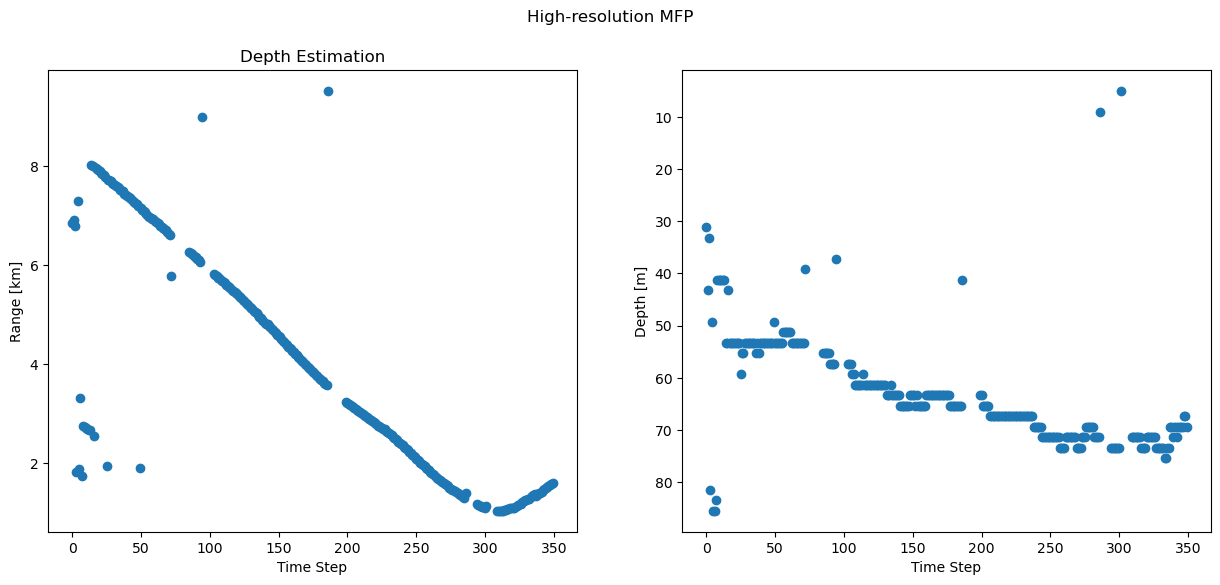

In [5]:
zvec = np.linspace(1, 200, 100)
rvec = np.linspace(10e-3, 10, 500)

timesteps = []
ranges = []
depths = []
for t in range(350):
    try:
        surf = np.load(AMBSURF_PATH / f"ambsurf_mf_t={t + 1:03d}.npy")
    except FileNotFoundError:
        continue
    inds = np.unravel_index(surf.argmax(), surf.shape)
    timesteps.append(t)
    depths.append(zvec[inds[0]])
    ranges.append(rvec[inds[1]])

timesteps = np.array(timesteps)
ranges = np.array(ranges)
depths = np.array(depths)

fig, axs = plt.subplots(figsize=(15, 6), ncols=2)

axs[0].scatter(timesteps, ranges)
axs[0].set_xlabel("Time Step")
axs[0].set_ylabel("Range [km]")
axs[0].set_title("Range Estimation")

axs[1].scatter(timesteps, depths)
axs[1].invert_yaxis()
axs[1].set_xlabel("Time Step")
axs[1].set_ylabel("Depth [m]")
axs[0].set_title("Depth Estimation")
fig.suptitle("High-resolution MFP")
plt.show()

### Localization with constrained depth

Array tilt and a sloped bottom cause mismatch between the true and modeled environments, leading to source depth shifting deeper as the source approaches CPA. To permit the optimization strategies to obtain more accurate range estimations, source depth is allowed to be searched within a narrow range rather than remaining fixed.

Load experimental data results.

In [7]:
serial = "serial_constrained_50-75"
df = pd.read_csv(
    ROOT / "Data" / "localization" / "experimental" / serial / "results" / "best_results.csv"
)
df["scenario"] = (
    df["scenario"]
    .apply(lambda x: ast.literal_eval(x))
    .apply(lambda x: list(x.values())[0])
)
df = df.rename(columns={"scenario": "Time Step"})
print(df["strategy"].unique())

['greedy_batch_qei5' 'lhs' 'random' 'sobol' 'grid' 'sequential_qpi1'
 'sequential_qei1']


#### Range estimation

Strategy       MAE
0  greedy_batch_qei5  0.409647
6    sequential_qei1  0.471839
3              sobol  0.649664
1                lhs  0.731819
2             random  0.940280
4               grid  0.961203
5    sequential_qpi1  1.237600

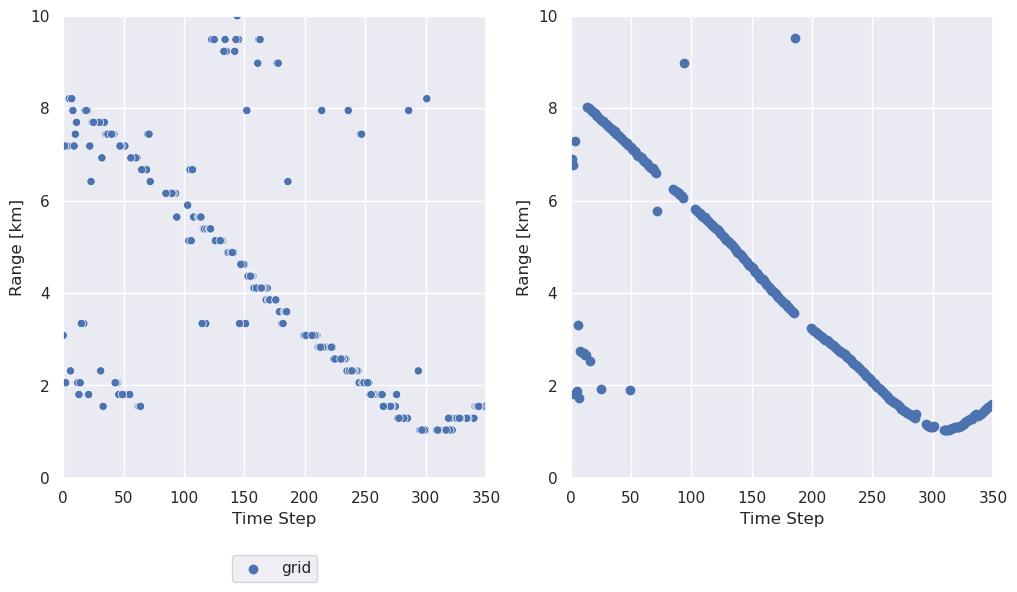

In [8]:
sns.set_theme(style="darkgrid")
# import matplotlib.pyplot as plt

zvec = np.linspace(1, 200, 100)
rvec = np.linspace(10e-3, 10, 500)
zind = np.argmin(np.abs(zvec - 60))

fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
ax = axs[0]
sns.scatterplot(
    data=df[df["strategy"] == "grid"], x="Time Step", y="rec_r", hue="strategy", ax=ax
)
# sns.scatterplot(data=df, x="Time Step", y="rec_r", hue="strategy", ax=ax)
ax.set_ylabel("Range [km]")
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncols=4)
ax.set_xlim([0, 350])
ax.set_ylim([0, 10])

timesteps = []
ranges = []
for t in range(350):
    try:
        surf = np.load(AMBSURF_PATH / f"ambsurf_mf_t={t + 1:03d}.npy")
        # zslice = surf[zind]
        # rind = np.argmax(zslice)
        inds = np.unravel_index(surf.argmax(), surf.shape)
        # ranges.append(rvec[rind])

        # depths.append(zvec[inds[0]])
        ranges.append(rvec[inds[1]])
        timesteps.append(t)
    except FileNotFoundError:
        continue

ax = axs[1]
ax.scatter(timesteps, ranges)
ax.set_xlabel("Time Step")
ax.set_ylabel("Range [km]")
ax.set_xlim([0, 350])
ax.set_ylim([0, 10])


timesteps = np.array(timesteps)
ranges = np.array(ranges)
errors = []
for strategy in df["strategy"].unique():
    r_est = df[df["strategy"] == strategy].sort_values("Time Step")["rec_r"].values
    est_timesteps = (
        df[df["strategy"] == strategy].sort_values("Time Step")["Time Step"].values
    )
    inds = np.in1d(timesteps, est_timesteps)
    r = ranges[inds]

    # MSE = np.mean((r_est - r) ** 2)
    MAE = np.mean(np.abs(r_est - r))
    errors.append({"Strategy": strategy, "MAE": MAE})

error_df = pd.DataFrame.from_dict(errors).sort_values("MAE")
error_df

#### Depth estimation

Strategy       MAE
6    sequential_qei1  2.159437
5    sequential_qpi1  3.558255
0  greedy_batch_qei5  3.650346
4               grid  5.016879
3              sobol  5.256734
2             random  5.264622
1                lhs  5.277905

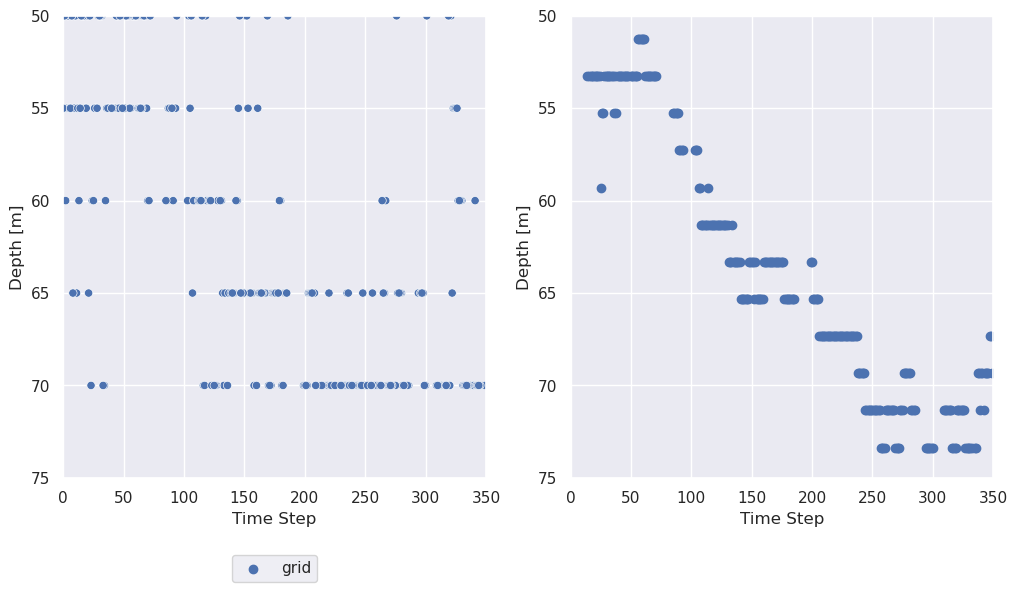

In [9]:
sns.set_theme(style="darkgrid")
# import matplotlib.pyplot as plt

zvec = np.linspace(1, 200, 100)
rvec = np.linspace(10e-3, 10, 500)
# zind = np.argmin(np.abs(zvec - 60))

fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
ax = axs[0]
sns.scatterplot(
    data=df[df["strategy"] == "grid"], x="Time Step", y="src_z", hue="strategy", ax=ax
)
# sns.scatterplot(data=df, x="Time Step", y="src_z", hue="strategy", ax=ax)
ax.set_ylabel("Depth [m]")
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncols=4)
ax.set_xlim([0, 350])
ax.set_ylim([75, 50])

timesteps = []
depths = []
for t in range(350):
    try:
        surf = np.load(AMBSURF_PATH / f"ambsurf_mf_t={t + 1:03d}.npy")
        # zslice = surf[zind]
        # rind = np.argmax(zslice)
        inds = np.unravel_index(surf.argmax(), surf.shape)
        # ranges.append(rvec[rind])

        # depths.append(zvec[inds[0]])
        depths.append(zvec[inds[0]])
        timesteps.append(t)
    except FileNotFoundError:
        continue

ax = axs[1]
ax.scatter(timesteps, depths)
ax.set_xlabel("Time Step")
ax.set_ylabel("Depth [m]")
ax.set_xlim([0, 350])
ax.set_ylim([75, 50])

# timesteps = np.array(timesteps)
depths = np.array(depths)
errors = []
for strategy in df["strategy"].unique():
    z_est = df[df["strategy"] == strategy].sort_values("Time Step")["src_z"].values
    est_timesteps = (
        df[df["strategy"] == strategy].sort_values("Time Step")["Time Step"].values
    )
    inds = np.in1d(timesteps, est_timesteps)
    z = depths[inds]

    # MSE = np.mean((r_est - r) ** 2)
    MAE = np.mean(np.abs(z_est - z))
    errors.append({"Strategy": strategy, "MAE": MAE})

error_df = pd.DataFrame.from_dict(errors).sort_values("MAE")
error_df

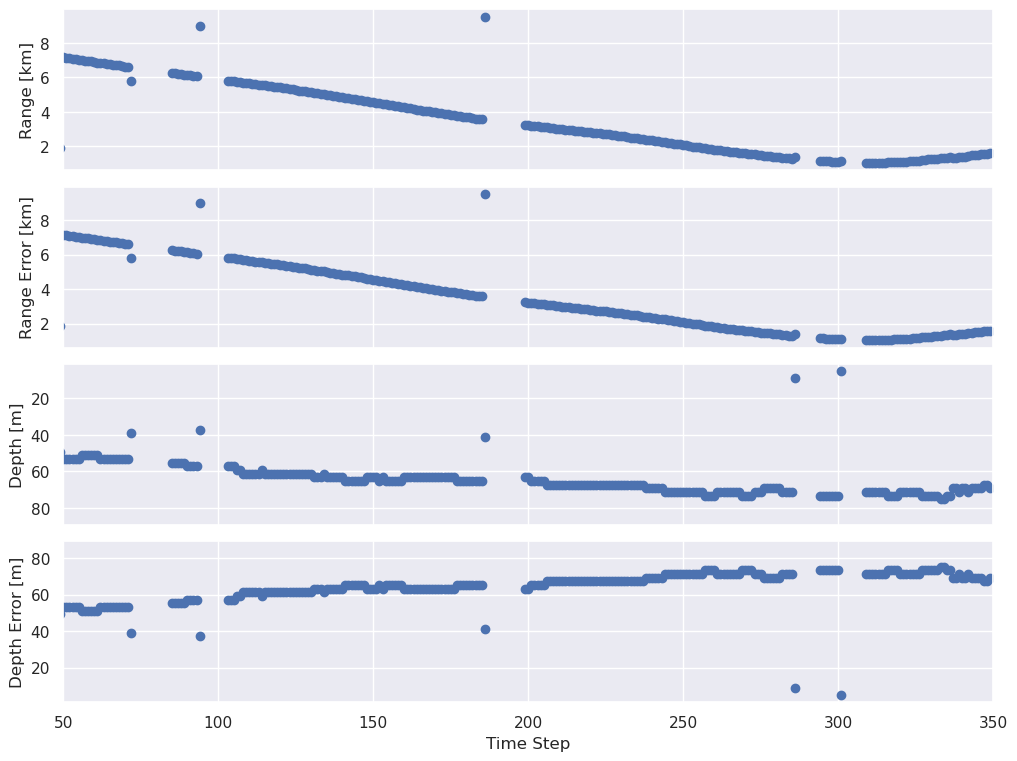

In [25]:
SKIP_T = (
    list(range(73, 85))
    + list(range(95, 103))
    + list(range(187, 199))
    + list(range(287, 294))
    + list(range(302, 309))
)
XLIM = [50, 350]

fig, axs = plt.subplots(figsize=(12, 9), nrows=4, gridspec_kw={"hspace": 0.1})

# High-res MFP
zvec = np.linspace(1, 200, 100)
rvec = np.linspace(10e-3, 10, 500)

timesteps = []
ranges = []
depths = []
skip = []
for t in range(350):
    try:
        surf = np.load(AMBSURF_PATH / f"ambsurf_mf_t={t + 1:03d}.npy")
    except FileNotFoundError:
        continue
    inds = np.unravel_index(surf.argmax(), surf.shape)
    timesteps.append(t)
    depths.append(zvec[inds[0]])
    ranges.append(rvec[inds[1]])

timesteps = np.array(timesteps)
ranges = np.array(ranges)
depths = np.array(depths)


ax = axs[0]
ax.scatter(timesteps, ranges)
ax.set_xticklabels([])
ax.set_xlim(XLIM)
ax.set_xlabel(None)
ax.set_ylabel("Range [km]")

ax = axs[1]
ax.scatter(timesteps, ranges)
ax.set_xticklabels([])
ax.set_xlim(XLIM)
ax.set_xlabel(None)
ax.set_ylabel("Range Error [km]")

ax = axs[2]
ax.scatter(timesteps, depths)
ax.invert_yaxis()
ax.set_xticklabels([])
ax.set_xlim(XLIM)
ax.set_xlabel(None)
ax.set_ylabel("Depth [m]")

ax = axs[3]
ax.scatter(timesteps, depths)
ax.set_xlim(XLIM)
ax.set_xlabel("Time Step")
ax.set_ylabel("Depth Error [m]")




plt.show()

### Full localization

Load experimental data results.

In [ ]:
serial = "serial_full_depth"
df = pd.read_csv(
    ROOT / "Data" / "localization" / "experimental" / serial / "results" / "best_results.csv"
)
df["scenario"] = (
    df["scenario"]
    .apply(lambda x: ast.literal_eval(x))
    .apply(lambda x: list(x.values())[0])
)
df = df.rename(columns={"scenario": "Time Step"})
print(df["strategy"].unique())

#### Range estimation

In [ ]:
sns.set_theme(style="darkgrid")
# import matplotlib.pyplot as plt

zvec = np.linspace(1, 200, 100)
rvec = np.linspace(10e-3, 10, 500)
zind = np.argmin(np.abs(zvec - 60))

fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
ax = axs[0]
sns.scatterplot(
    data=df[df["strategy"] == "grid"], x="Time Step", y="rec_r", hue="strategy", ax=ax
)
# sns.scatterplot(data=df, x="Time Step", y="rec_r", hue="strategy", ax=ax)
ax.set_ylabel("Range [km]")
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncols=4)
ax.set_xlim([0, 350])
ax.set_ylim([0, 10])

timesteps = []
ranges = []
for t in range(350):
    try:
        surf = np.load(AMBSURF_PATH / f"ambsurf_mf_t={t + 1:03d}.npy")
        # zslice = surf[zind]
        # rind = np.argmax(zslice)
        inds = np.unravel_index(surf.argmax(), surf.shape)
        # ranges.append(rvec[rind])

        # depths.append(zvec[inds[0]])
        ranges.append(rvec[inds[1]])
        timesteps.append(t)
    except FileNotFoundError:
        continue

ax = axs[1]
ax.scatter(timesteps, ranges)
ax.set_xlabel("Time Step")
ax.set_ylabel("Range [km]")
ax.set_xlim([0, 350])
ax.set_ylim([0, 10])


timesteps = np.array(timesteps)
ranges = np.array(ranges)
errors = []
for strategy in df["strategy"].unique():
    r_est = df[df["strategy"] == strategy].sort_values("Time Step")["rec_r"].values
    est_timesteps = (
        df[df["strategy"] == strategy].sort_values("Time Step")["Time Step"].values
    )
    inds = np.in1d(timesteps, est_timesteps)
    r = ranges[inds]

    # MSE = np.mean((r_est - r) ** 2)
    MAE = np.mean(np.abs(r_est - r))
    errors.append({"Strategy": strategy, "MAE": MAE})

error_df = pd.DataFrame.from_dict(errors).sort_values("MAE")
error_df

#### Depth estimation

In [ ]:
sns.set_theme(style="darkgrid")
# import matplotlib.pyplot as plt

zvec = np.linspace(1, 200, 100)
rvec = np.linspace(10e-3, 10, 500)
# zind = np.argmin(np.abs(zvec - 60))

fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
ax = axs[0]
sns.scatterplot(
    data=df[df["strategy"] == "grid"], x="Time Step", y="src_z", hue="strategy", ax=ax
)
# sns.scatterplot(data=df, x="Time Step", y="src_z", hue="strategy", ax=ax)
ax.set_ylabel("Depth [m]")
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncols=4)
ax.set_xlim([0, 350])
ax.set_ylim([75, 50])

timesteps = []
depths = []
for t in range(350):
    try:
        surf = np.load(AMBSURF_PATH / f"ambsurf_mf_t={t + 1:03d}.npy")
        # zslice = surf[zind]
        # rind = np.argmax(zslice)
        inds = np.unravel_index(surf.argmax(), surf.shape)
        # ranges.append(rvec[rind])

        # depths.append(zvec[inds[0]])
        depths.append(zvec[inds[0]])
        timesteps.append(t)
    except FileNotFoundError:
        continue

ax = axs[1]
ax.scatter(timesteps, depths)
ax.set_xlabel("Time Step")
ax.set_ylabel("Depth [m]")
ax.set_xlim([0, 350])
ax.set_ylim([75, 50])

# timesteps = np.array(timesteps)
depths = np.array(depths)
errors = []
for strategy in df["strategy"].unique():
    z_est = df[df["strategy"] == strategy].sort_values("Time Step")["src_z"].values
    est_timesteps = (
        df[df["strategy"] == strategy].sort_values("Time Step")["Time Step"].values
    )
    inds = np.in1d(timesteps, est_timesteps)
    z = depths[inds]

    # MSE = np.mean((r_est - r) ** 2)
    MAE = np.mean(np.abs(z_est - z))
    errors.append({"Strategy": strategy, "MAE": MAE})

error_df = pd.DataFrame.from_dict(errors).sort_values("MAE")
error_df

# High-resolution MFP using OAO

In [256]:
# results = "/Users/williamjenkins/Research/Projects/BOGP/Data/localization/experimental/serial_test_surf/timestep=250/grid/seed_0292288111/results.json"
# client = AxClient.load_from_json_file(results)

df = pd.read_csv("/Users/williamjenkins/Research/Projects/BOGP/Data/localization/experimental/serial_test_surf4/results/aggregated_results.csv", index_col=0)
df["scenario"] = df["scenario"].apply(lambda x: ast.literal_eval(x)).apply(lambda x: list(x.values())[0])
df = df.rename(columns={"scenario": "Time Step"})

rvec = np.unique(df["rec_r"].values)
zvec = np.unique(df["src_z"].values)
M = len(zvec)
N = len(rvec)

surf = np.reshape(df["bartlett"].values, (M, N)).T
src_z_ind, src_r_ind = np.unravel_index(np.argmax(surf), (len(zvec), len(rvec)))
src_z_ind, src_r_ind

(13, 10)

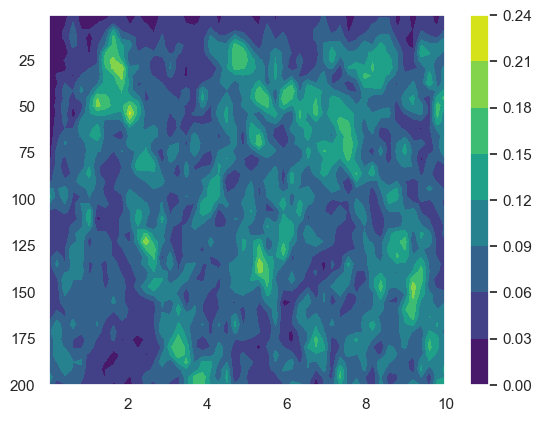

In [257]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

r = np.reshape(df["rec_r"].values, (N, M)).T
z = np.reshape(df["src_z"].values, (N, M)).T

fig = plt.figure()
# ax = fig.add_subplot(projection="3d")
# ax.plot_surface(X=r, Y=z, Z=surf)
plt.contourf(r, z, surf, cmap="viridis")
plt.gca().invert_yaxis()
plt.colorbar()

Text(0, 0.5, 'Depth [m]')

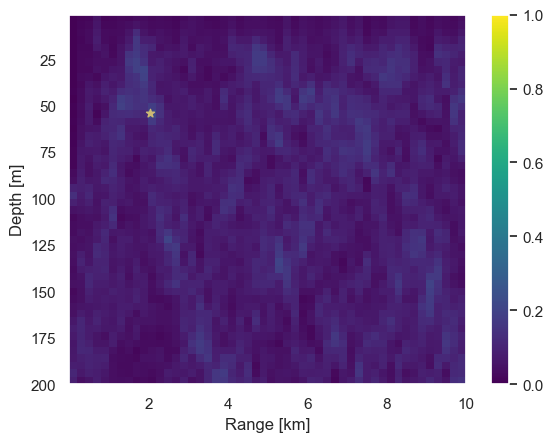

In [258]:
plt.imshow(surf, aspect="auto", origin="lower", cmap="viridis", interpolation="none", vmin=0, vmax=1, extent=[min(rvec), max(rvec), min(zvec), max(zvec)])
plt.colorbar()
plt.scatter(rvec[src_r_ind], zvec[src_z_ind], c="y", marker="*")
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel("Range [km]")
plt.ylabel("Depth [m]")

# Performance

In [56]:
timestep = 230
strategy = "greedy_batch_qei"

results = f"/Users/williamjenkins/Research/Projects/BOGP/Data/localization/experimental/serial_constrained_localization/timestep={timestep}/{strategy}/seed_0292288111/results.json"
client = AxClient.load_from_json_file(results)
print(client.get_trials_data_frame())
print(client.get_best_parameters())
render(client.get_optimization_trace())
render(client.get_contour_plot())

({'rec_r': 2.596457656024347, 'src_z': 67.59891484785459}, ({'bartlett': 0.742398550060562}, {'bartlett': {'bartlett': 9.510619868672074e-09}}))
